In [1]:
import pandas as pd

subway_df = pd.read_csv('nyc_subway_weather.csv')

In [2]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [3]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['meanprecipi'])

0.03564851577223041

In [4]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['ENTRIESn'])

0.5858954707662182

In [5]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [6]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

Populating the interactive namespace from numpy and matplotlib


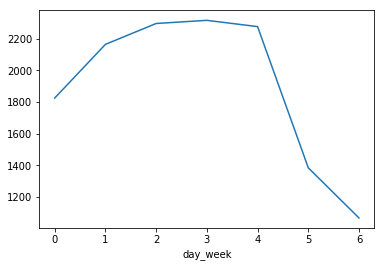

In [7]:
%pylab inline
import seaborn as sns

ridership_by_day.plot()

In [8]:
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()

In [9]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

In [10]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [11]:
scaled_entries = (data_by_location['ENTRIESn_hourly'] / 
                  data_by_location['ENTRIESn_hourly'].std())

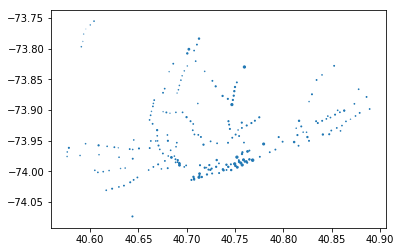

In [12]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], 
            s=scaled_entries)